# Import Modules

We will need some basic packages, but will also need to import different AutoRA theorists. Here, we will import two theorists: Differentiable Architecture Search, and Logistic Regression.

Note that we are currently re-structuring the AutoRA package so that all experimentalists and theorists are their own sub-package. As such, once this is complete for the theorists, these imports should be modified to conform to the new structure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autora.theorist.darts import DARTSRegressor; DARTSRegressor()
from sklearn.linear_model import LogisticRegression
from autora.experimentalist.sampler.leverage import leverage_sample

c:\Users\cwill\GitHub\virtualEnvs\autoraEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define Meta-Space

We will here define X values of interest as well as a ground truth model to derive y values.

In [3]:
#Define meta-parameters
X = np.linspace(start=-3, stop=6, num=10).reshape(-1, 1)

#Define ground truth model
def ground_truth(xs):
    y = (xs ** 2.0)
    y[xs < 0] = 0
    return y

# Plot the Data

Let's plot the data to see what we are working with.

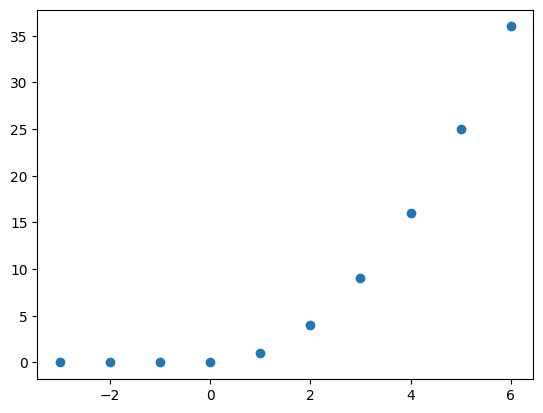

In [4]:
plt.plot(X, ground_truth(X), 'o')
plt.show()

# Define and Fit Theorists

Next, we initialize each theorist and then train them on the data. 

Note that this can take quite some time, especially for the BSR Theorist.

In [5]:
%%capture

#Initiate theorists
darts_theorist = DARTSRegressor()
lr_theorist = LogisticRegression()

#Fit theorists
darts_theorist.fit(X,ground_truth(X))
lr_theorist.fit(X,ground_truth(X).ravel())

# Plot Theorists on Data

We can then plot each theorist to see how well it recovered the data.

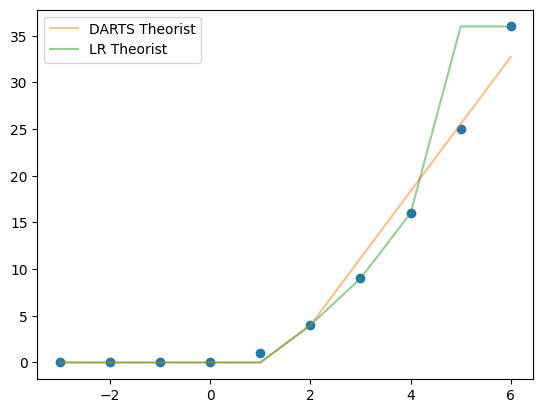

In [6]:
plt.plot(X, ground_truth(X), 'o')
plt.plot(X, darts_theorist.predict(X), alpha = .5, label = 'DARTS Theorist')
plt.plot(X, lr_theorist.predict(X), alpha = .5, label = 'LR Theorist')
plt.legend()
plt.show()

# Run and Leverage Samples

Now we will get a proposal from the sampler as to which datapoints to investigate next. We will retrieve 5 new datapoints in this example.

In [8]:
darts_model_theorist = [darts_theorist, DARTSRegressor()]
lr_model_theorist = [lr_theorist, LogisticRegression()]
sampler_proposal = leverage_sample(X, ground_truth(X), [darts_model_theorist, lr_model_theorist], fit = 'both', num_samples = 5)

print('New datapoints:\n' + str(sampler_proposal))

100%|██████████| 10/10 [00:00<00:00, 30.61it/s]


New datapoints:
[[ 6.]
 [-3.]
 [ 2.]
 [ 3.]
 [ 5.]]


# Plot New Datapoints With Old

We can then plot our new datapoints with our previous ones to demonstrate our new dataset of investigation for then next cycle.

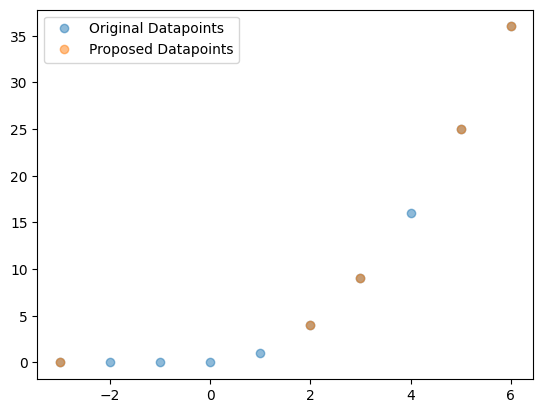

In [9]:
plt.plot(X, ground_truth(X), 'o', alpha = .5, label = 'Original Datapoints')
plt.plot(sampler_proposal, ground_truth(sampler_proposal), 'o', alpha = .5, label = 'Proposed Datapoints')
plt.legend()
plt.show()